In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from sklearn.utils import resample
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [106]:
# Import dataset
clean=pd.read_csv('clean_kaggle_data.csv')
clean.head()


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. 

In [108]:
# 1.1 relationship bwtween education and salary

clean_edu=clean.loc[:, ['Q4', 'Q25']]
clean_edu_group=clean_edu.groupby('Q4').describe()
clean_edu_group

Q25                \
                                                     count          mean   
Q4                                                                         
Bachelor’s degree                                   4777.0  35578.291815   
Doctoral degree                                     2217.0  70641.181777   
I prefer not to answer                               334.0  34191.616766   
Master’s degree                                     6799.0  52706.868657   
No formal education past high school                 228.0  38208.333333   
Professional doctorate                               290.0  67465.517241   
Some college/university study without earning a...   746.0  41990.616622   

                                                                           \
                                                              std     min   
Q4                                                                          
Bachelor’s degree                                    89382.060777  1000.0   
Doctoral degree                                     117160.947589  1000.0   
I prefer not to answer                              113660.692249  1000.0   
Master’s degree                                      90928.786678  1000.0   
No formal education past high school                100811.090707  1000.0   
Professional doctorate                              136718.387541  1000.0   
Some college/university study without earning a...  110270.037272  1000.0   

                                                                              \
                                                       25%      50%      75%   
Q4                                                                             
Bachelor’s degree                                   1000.0   7500.0  40000.0   
Doctoral degree                                     4000.0  40000.0  90000.0   
I prefer not to answer                              1000.0   4000.0  25000.0   
Master’s degree                                     3000.0  25000.0  70000.0   
No formal education past high school                1000.0   7500.0  50000.0   
Professional doctorate                              2000.0  20000.0  80000.0   
Some college/university study without earning a...  1000.0  10000.0  50000.0   

                                                               
                                                          max  
Q4                                                             
Bachelor’s degree                                   1000000.0  
Doctoral degree                                     1000000.0  
I prefer not to answer                              1000000.0  
Master’s degree                                     1000000.0  
No formal education past high school                1000000.0  
Professional doctorate                              1000000.0  
Some college/university study without earning a...  1000000.0

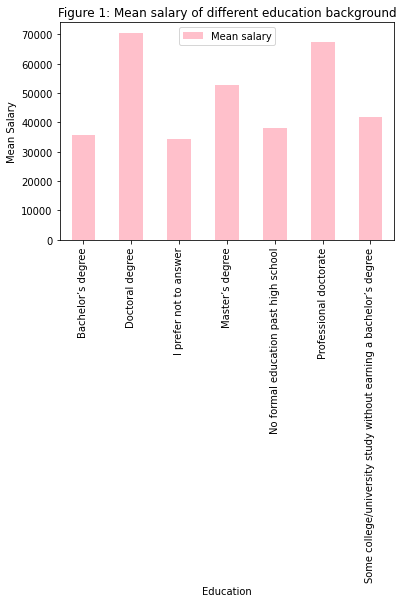

In [109]:
clean_edu_group_mean=clean_edu_group.iloc[:,1].rename_axis('Education').reset_index(name='Mean salary')
#clean_edu_group_mean
salary=clean_edu_group_mean.iloc[:,1]
clean_edu_group_mean.plot.bar(x='Education', color='pink')
plt.ylabel('Mean Salary')
plt.title('Figure 1: Mean salary of different education background')
plt.savefig('Figure 1: Education vs Salary.png')

In [110]:
# 1.2 relationship between age and salary 
# Select Age and Salary, present the descriptive data
# Select Age and Salary from the origin dataset
age = clean[['Q1','Q25']]
# Sort with ascending order of ages
age = age.sort_values(by="Q1")
age.rename(columns={'Q1':'Age Groups','Q25':'Salary'}, inplace=True)
 # Descriptive data
age.groupby('Age Groups').describe()


Salary                                                          \
             count           mean            std     min      25%      50%   
Age Groups                                                                   
18-21        931.0   15722.878625   86677.395961  1000.0   1000.0   1000.0   
22-24       2092.0   19918.738050   81903.864589  1000.0   1000.0   3000.0   
25-29       3235.0   29213.910355   68629.908266  1000.0   2000.0  10000.0   
30-34       2626.0   47932.025895   84957.880022  1000.0   3000.0  25000.0   
35-39       1992.0   59316.265060  103367.663264  1000.0   4000.0  25000.0   
40-44       1528.0   67760.798429  109596.664315  1000.0   7500.0  40000.0   
45-49       1141.0   82403.593339  121998.820440  1000.0  15000.0  50000.0   
50-54        791.0   82304.677623  112676.455554  1000.0  10000.0  50000.0   
55-59        504.0   97216.269841  140218.945713  1000.0  15000.0  60000.0   
60-69        454.0   87435.022026  103111.079789  1000.0  10000.0  60000.0   
70+           97.0  100469.072165  161287.153576  1000.0   2000.0  50000.0   

                                 
                 75%        max  
Age Groups                       
18-21         3000.0  1000000.0  
22-24        15000.0  1000000.0  
25-29        40000.0  1000000.0  
30-34        70000.0  1000000.0  
35-39        80000.0  1000000.0  
40-44        90000.0  1000000.0  
45-49       100000.0  1000000.0  
50-54       125000.0  1000000.0  
55-59       125000.0  1000000.0  
60-69       125000.0  1000000.0  
70+         125000.0  1000000.0

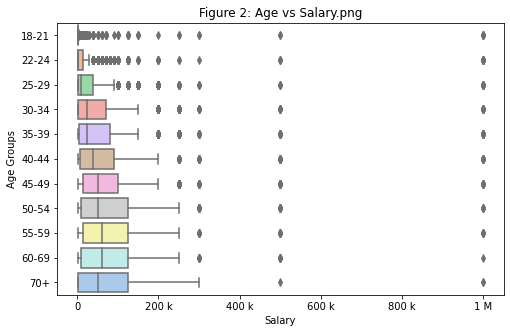

In [111]:
# Plot a boxplot to show the relationship between age and salary
fig,ax=plt.subplots(figsize=(8,5))
sns.boxplot(ax=ax, data=age,x='Salary', y='Age Groups',palette="pastel")
# Format y-axis
ax.xaxis.set_major_formatter(ticker.EngFormatter()) 
plt.title('Figure 2: Age vs Salary.png')
plt.savefig('Figure 2: Age vs Salary.png')
plt.show()

In [112]:
#1.3 relationship between countries and female data scientist's salary

In [113]:
# Select woman from the origin dataset
female = clean.loc[clean.Q2=='Woman']
# Select countries and salary from dataset and sort with ascending order of salary
country=female.loc[:, ['Q3', 'Q25']].sort_values('Q25')
# Descriptive data
country_group=country.groupby('Q3').describe()
country_group

Q25                \
                                                    count          mean   
Q3                                                                        
Algeria                                               3.0   3500.000000   
Argentina                                            16.0  17812.500000   
Australia                                            19.0  79526.315789   
Austria                                               7.0  27000.000000   
Bangladesh                                            5.0   4600.000000   
...                                                   ...           ...   
Ukraine                                              16.0  11781.250000   
United Arab Emirates                                 14.0  40428.571429   
United Kingdom of Great Britain and Northern Ir...   78.0  59256.410256   
United States of America                            386.0  98591.968912   
Viet Nam                                             28.0   4964.285714   

                                                                          \
                                                             std     min   
Q3                                                                         
Algeria                                              3500.000000  1000.0   
Argentina                                           23958.210145  1000.0   
Australia                                           51493.654864  1000.0   
Austria                                             28059.460674  3000.0   
Bangladesh                                           4929.503018  1000.0   
...                                                          ...     ...   
Ukraine                                             14842.471436  1000.0   
United Arab Emirates                                46342.727063  1000.0   
United Kingdom of Great Britain and Northern Ir...  45610.273364  1000.0   
United States of America                            99962.401829  1000.0   
Viet Nam                                             6672.120785  1000.0   

                                                                      \
                                                        25%      50%   
Q3                                                                     
Algeria                                              1500.0   2000.0   
Argentina                                            1750.0   8750.0   
Australia                                           60000.0  90000.0   
Austria                                              3000.0  20000.0   
Bangladesh                                           1000.0   1000.0   
...                                                     ...      ...   
Ukraine                                              1750.0   4500.0   
United Arab Emirates                                 2000.0  27500.0   
United Kingdom of Great Britain and Northern Ir...  30000.0  50000.0   
United States of America                            40000.0  80000.0   
Viet Nam                                             1000.0   1000.0   

                                                                         
                                                         75%        max  
Q3                                                                       
Algeria                                               4750.0     7500.0  
Argentina                                            20000.0    90000.0  
Australia                                            95000.0   200000.0  
Austria                                              45000.0    70000.0  
Bangladesh                                           10000.0    10000.0  
...                                                      ...        ...  
Ukraine                                              15000.0    50000.0  
United Arab Emirates                                 57500.0   125000.0  
United Kingdom of Great Britain and Northern Ir...   80000.0   200000.0  
United States of America                 

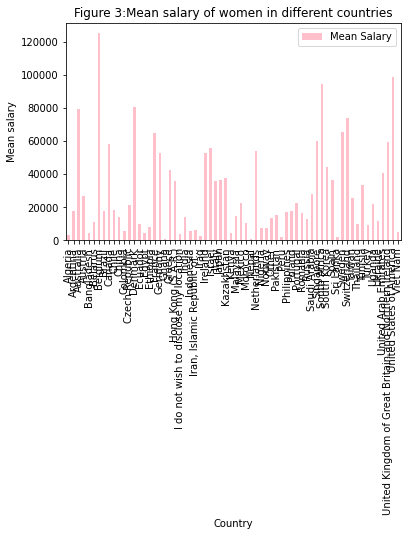

In [114]:
country_group_mean=country_group.iloc[:, 1].rename_axis('Country').reset_index(name='Mean Salary')
#country_group_mean
salary=country_group_mean.iloc[:, 1]
#print(country_group_mean.max())
# Plot the barplot
country_group_mean.plot.bar(x='Country', color='pink')
plt.ylabel('Mean salary')
plt.title('Figure 3:Mean salary of women in different countries')
plt.savefig('Figure 3: Mean salary of women in different countries.png')



In [115]:
# Estimating the difference between average salary (Q25) of men vs. women (Q2). 

In [116]:
# a.Compute and report descriptive statistics for each group (remove missing data, if necessary). 

In [117]:
male = clean.loc[clean.Q2=='Man']
# Select Men and Women, drop missing values and produce descriptive data
female_sal=female.loc[:, ['Q2', 'Q25']]
male_sal=male.loc[:, ['Q2', 'Q25']]
# Rename columns
female_sal.rename(columns={'Q2':'Gender','Q25':'Salary'}, inplace=True)
male_sal.rename(columns={'Q2':'Gender','Q25':'Salary'}, inplace=True)
female_sal = female_sal.dropna()
male_sal = male_sal.dropna()

#female_sal.describe()
# Combine the dataframe and print descriptive statistics
fm= pd.concat([female_sal, male_sal])
fm.groupby('Gender').describe()

Salary                                                                \
          count          mean           std     min     25%      50%      75%   
Gender                                                                          
Man     12642.0  51193.600696  99979.274378  1000.0  2000.0  20000.0  60000.0   
Woman    2482.0  34816.881547  72017.347888  1000.0  1000.0   7500.0  50000.0   

                   
              max  
Gender             
Man     1000000.0  
Woman   1000000.0

In [118]:
# b. If  suitable,  perform  a  two-sample  t-test  with  a  0.05  threshold.  Explain  your rationale. 

In [119]:
# Test the t-test assumption
#check normal distribution.This can be completed using the shapiro() method from Scipy.stats.0 with threshold = 0.05
stat_male, pval_male = stats.shapiro(male_sal['Salary'])
print('stat=%3f, p=%.3f' % (stat_male, pval_male))
if pval_male > 0.05:
    print('Man: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Man: The null hypothesis that the data are normally distributed is rejected')
stat_female, pval_female = stats.shapiro(female_sal['Salary'])
print('stat=%.3f, p=%.3f' % (stat_female, pval_female))
if pval_female > 0.05:
    print('Woman: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Woman: The null hypothesis that the data are normally distributed is rejected')

stat=0.471420, p=0.000
Man: The null hypothesis that the data are normally distributed is rejected
stat=0.462, p=0.000
Woman: The null hypothesis that the data are normally distributed is rejected


In [120]:
#Check Homogeneity of Variance 
stat,pval = stats.levene(male_sal['Salary'],female_sal['Salary'], center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Homogeneity of Variance is rejected


In [121]:
# ttest result
print('Normality and homogeneity of variance assumption did not pass, therefore it is not suitable to perform t-test.')

Normality and homogeneity of variance assumption did not pass, therefore it is not suitable to perform t-test.


In [122]:
# c.Bootstrap your data for comparing the mean of salary (Q25) for the two groups. 

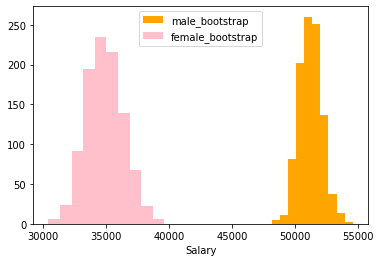

In [123]:

import random

male = clean.loc[clean.Q2=='Man']['Q25']
female = clean.loc[clean.Q2=='Woman']['Q25']
male_bootstrap=[]
female_bootstrap=[]
difference_mean=[]

for i in range(1000):
    # Resample with the length of the dataset
    sample1 = np.random.choice(female, replace=True, size=len(female))
    sample1_mean = np.mean(sample1)
    female_bootstrap.append(sample1_mean)
    sample2 = np.random.choice(male, replace=True, size=len(male))
    sample2_mean = np.mean(sample2)
    male_bootstrap.append(sample2_mean)
    # Difference
    difference_mean.append(sample2_mean-sample1_mean)

# Plot two groups in one
plt.hist(male_bootstrap, color = 'orange')
plt.xlabel('Salary')

plt.hist(female_bootstrap, color = 'pink')
plt.xlabel('Salary')
plt.legend(labels=['male_bootstrap','female_bootstrap'])
fig.suptitle('Figure 4: Histogram of Bootstrapped Men and Women Data')
plt.savefig('Figure 4: Histogram of Bootstrapped Men and Women Data.png')

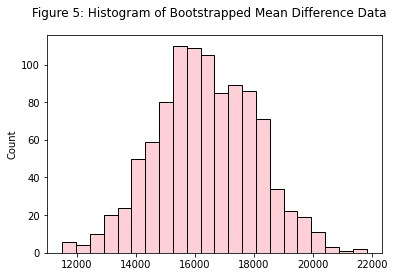

In [124]:
# Plot the difference histogram
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(ax=ax,data=difference_mean,color='pink')
fig.suptitle('Figure 5: Histogram of Bootstrapped Mean Difference Data')
plt.savefig('Figure 5: Histogram of Bootstrapped Mean Difference Data.png')
plt.show()

In [125]:
# d.If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale. 

In [126]:
# normality check 
stat_male, pval_male = stats.shapiro(male_bootstrap)
if pval_male > 0.05:
    print('Man: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Man: The null hypothesis that the data are normally distributed is rejected')
stat_female, pval_female = stats.shapiro(female_bootstrap)
if pval_female > 0.05:
    print('Woman: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Woman: The null hypothesis that the data are normally distributed is rejected')
    
#Check Homogeneity of Variance
stat,pval = stats.levene(male_bootstrap,female_bootstrap,center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Man: The null hypothesis that the data are normally distributed is not rejected 
Woman: The null hypothesis that the data are normally distributed is not rejected 
Homogeneity of Variance is rejected


In [127]:
# Welch's t test
t_stat,t_pval = stats.ttest_ind(male_bootstrap, female_bootstrap,equal_var = False)
print ("t-test: t = %f  p = %f" % (t_stat, t_pval))
if t_pval >0.05:
    print('There is no statistically significant difference in the average salary between man and woman')
else:
    print('There is a statistically significant difference in the average salary between man and woman')

t-test: t = 301.086032  p = 0.000000
There is a statistically significant difference in the average salary between man and woman


In [128]:
# e.Comment on your findings. 

In [129]:
print('Both the mean of salary between Man and Woman P-value are near 0, so we can know that the mean salary of man is greater than the mean salary of Woman.')

Both the mean of salary between Man and Woman P-value are near 0, so we can know that the mean salary of man is greater than the mean salary of Woman.


In [130]:
# 3

In [131]:
# a

In [132]:
# Select bachelor mastet and doctoral
Bachelor_sal = clean.loc[clean.Q4=='Bachelor’s degree']['Q25']
Master_sal=clean.loc[clean.Q4=='Master’s degree']['Q25']
Doctoral_sal=clean.loc[clean.Q4=='Doctoral degree']['Q25']

# Dropping missing values
print(Bachelor_sal.isnull().sum())
print(Master_sal.isnull().sum())
print(Doctoral_sal.isnull().sum())

#print(Bachelor_sal)

Bachelor=pd.DataFrame(Bachelor_sal).describe().rename_axis('Summary for Bachelor')
Bachelor

0
0
0


,Q25
Summary for Bachelor,
count,4777.000000
mean,35578.291815
std,89382.060777
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,40000.000000
max,1000000.000000


In [133]:
Master=pd.DataFrame(Master_sal).describe().rename_axis('Summary for Master')
Master

,Q25
Summary for Master,
count,6799.000000
mean,52706.868657
std,90928.786678
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,1000000.000000


In [134]:
Doctoral=pd.DataFrame(Doctoral_sal).describe().rename_axis('Summary for Doctoral')
Doctoral

,Q25
Summary for Doctoral,
count,2217.000000
mean,70641.181777
std,117160.947589
min,1000.000000
25%,4000.000000
50%,40000.000000
75%,90000.000000
max,1000000.000000


In [135]:
#b

In [136]:
#check normal distribution
b = clean.loc[clean.Q4=='Bachelor’s degree']
m = clean.loc[clean.Q4=='Master’s degree']
d = clean.loc[clean.Q4=='Doctoral degree']
# Select Men and Women, drop missing values and produce descriptive data

Bachelor_sal = b.loc[:,['Q4','Q25']]
Master_sal=clean.loc[:,['Q4','Q25']]
Doctoral_sal=clean.loc[:,['Q4','Q25']]
# Rename columns
Bachelor_sal.rename(columns={'Q4':'Education_level','Q25':'Salary'}, inplace=True)
Master_sal.rename(columns={'Q4':'Education_level','Q25':'Salary'}, inplace=True)
Doctoral_sal.rename(columns={'Q4':'Education_level','Q25':'Salary'}, inplace=True)

stat_b, p_b = stats.shapiro(Bachelor_sal['Salary'])

if p_b > 0.05:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_m, p_m = stats.shapiro(Master_sal['Salary'])

if p_m > 0.05:
    print('Master’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Master’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_d, p_d = stats.shapiro(Doctoral_sal['Salary'])
if p_d > 0.05:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is rejected')


#Check Homogeneity of Variance with threshold =0.05 
stat,pval = stats.levene(Bachelor_sal['Salary'],Master_sal['Salary'],Doctoral_sal['Salary'], center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected
Master’s degree: The null hypothesis that the data are normally distributed is rejected
Doctoral degree: The null hypothesis that the data are normally distributed is rejected
Homogeneity of Variance is rejected


In [137]:
print('Normality and homogeneity of variance assumptions are rejected, ANOVA test will not perform ')

Normality and homogeneity of variance assumptions are rejected, ANOVA test will not perform 


In [138]:
#c

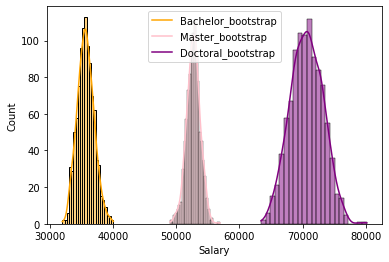

In [139]:
difference_mean_mb =[]
difference_mean_db =[]
difference_mean_dm =[]
Bachelor_bootstrap=[]
Master_bootstrap=[]
Doctoral_bootstrap=[]
edu = clean[['Q4','Q25']]
edu.rename(columns={'Q4':'Education','Q25':'Salary'},inplace=True)
# Dropping missing values
edu = edu.dropna()
# Select bachelor mastet and doctoral
edu_bachelor = edu.loc[edu['Education']=='Bachelor’s degree']
edu_master = edu.loc[edu['Education']=='Master’s degree']
edu_doctoral = edu.loc[edu['Education']=='Doctoral degree']
# Combine and produce descriptive statistics
edu= pd.concat([edu_bachelor, edu_master, edu_doctoral])
#edu.groupby('Education').describe()

b_salary = edu_bachelor['Salary'].to_numpy()
m_salary = edu_master['Salary'].to_numpy()
d_salary = edu_doctoral['Salary'].to_numpy()

for i in range(1000):
    # Bootstrapped resampling
    sample_b = np.random.choice(b_salary, replace=True, size=len(b_salary))
    sample_b_mean = np.mean(sample_b)
    Bachelor_bootstrap.append(sample_b_mean)
    sample_m = np.random.choice(m_salary, replace=True, size=len(m_salary))
    sample_m_mean= np.mean(sample_m)
    Master_bootstrap.append(sample_m_mean)
    sample_d = np.random.choice(d_salary, replace=True, size=len(d_salary))
    sample_d_mean = np.mean(sample_d)
    Doctoral_bootstrap.append(sample_d_mean)
    # Difference between each two groups
    difference_mean_mb.append(sample_m_mean-sample_b_mean)
    difference_mean_db.append(sample_d_mean-sample_b_mean)
    difference_mean_dm.append(sample_d_mean-sample_m_mean)

bootstrap_edu = pd.DataFrame({'Bachelor Degree':Bachelor_bootstrap,'Master Degree':Master_bootstrap,'Doctoral Degree':Doctoral_bootstrap})
# Plot three groups in one to compare
sns.histplot(data = Bachelor_bootstrap, kde = True, color='orange')
sns.histplot(data = Master_bootstrap, kde = True, color='pink')
sns.histplot(data = Doctoral_bootstrap, kde = True, color='purple')
plt.xlabel('Salary')
plt.legend(labels=['Bachelor_bootstrap', 'Master_bootstrap', 'Doctoral_bootstrap'])
fig.suptitle("Figure 6: Distribution of Bootstrapped Education'Salary")
plt.savefig("Figure 6: Distribution of Bootstrapped Education'Salary.png")
plt.show()

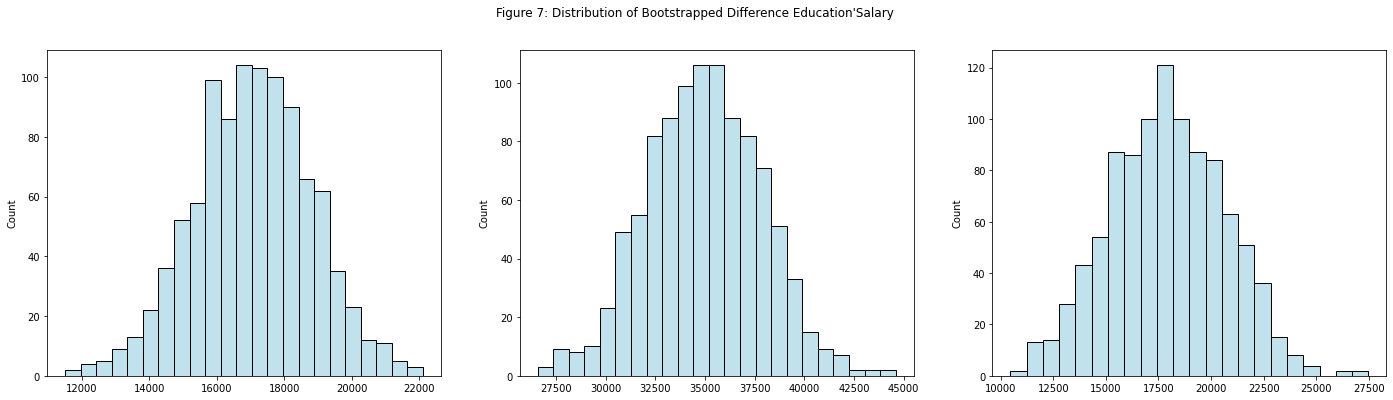

In [140]:

# Distribution of Bootstrapped Difference
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(24,6))
sns.histplot(ax=ax[0],data=difference_mean_mb,color='lightblue')
sns.histplot(ax=ax[1],data=difference_mean_db,color='lightblue')
sns.histplot(ax=ax[2],data=difference_mean_dm,color='lightblue')
fig.suptitle("Figure 7: Distribution of Bootstrapped Difference Education'Salary")
plt.savefig("Figure 7: Distribution of Bootstrapped Difference Education'Salary.png")
plt.show()


In [141]:
#d

In [142]:
#check normal distribution.
stat_b, p_b = stats.shapiro(Bachelor_bootstrap)
#print('stat=%f, p=%f' % (stat_m, p_m))
if p_b > 0.05:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_mas, p_mas = stats.shapiro(Master_bootstrap)
#print('stat=%.3f, p=%.5f' % (stat_mas, p_mas))
if p_mas > 0.05:
    print('Master’s degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Master’s degree: The null hypothesis that the data are normally distributed is rejected')

stat_d, p_d = stats.shapiro(Doctoral_bootstrap)
if p_d > 0.05:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is not rejected ')
else:
    print('Doctoral degree: The null hypothesis that the data are normally distributed is rejected')

#Check Homogeneity of Variance
stat,pval = stats.levene(Bachelor_bootstrap,Master_bootstrap,Doctoral_bootstrap,center= 'mean')
if pval>0.05:
    print('Homogeneity of Variance is not rejected')
else:
    print('Homogeneity of Variance is rejected')

Bachelor’s degree: The null hypothesis that the data are normally distributed is rejected
Master’s degree: The null hypothesis that the data are normally distributed is not rejected 
Doctoral degree: The null hypothesis that the data are normally distributed is not rejected 
Homogeneity of Variance is rejected


In [143]:
#assume all normal and equal variance
#showing the implementation of ANOVA test
F,p = stats.f_oneway(Bachelor_bootstrap,Master_bootstrap, Doctoral_bootstrap)
print ("ANOVA-test: F = %f  p = %f" % (F, p))
if p >0.05:
    print('There is no statistically significant difference in the average salary between the three degree')
else:
    print('There is a statistically significant difference in the average salary between the three degree')

ANOVA-test: F = 96610.951888  p = 0.000000
There is a statistically significant difference in the average salary between the three degree


In [144]:
#e

In [145]:
print('According to the ANOVA, the pvalue is 0, so we can conclude that the three group (Bachelor, Master, Doctoral) mean are significantly different, so we can say that the mean of salary for three groups are different from each other')

According to the ANOVA, the pvalue is 0, so we can conclude that the three group (Bachelor, Master, Doctoral) mean are significantly different, so we can say that the mean of salary for three groups are different from each other
